# AI 06a Iris

> 학번: 2016145015
>
> 이름: 이두현

---


### 1. Prepare Data

---

**붓꽃 분류 문제**

- 붓꽃의 4가지 속성 (꽃받침의 길이와 너비, 꽃잎의 길이와 너비)을 사용하여 3개의 붓꽃 종류 (Setosa, Versicolour, Virginica) 를 분류하는 문제
- 총 150개의 데이터 중 각 분류마다 50개
- Train set - 120, Test set - 30
- 코드에서 다음 3가지 항목들을 변경해보며 test 정확도를 향상:

1. 신경망의 층 수와 노드 수 (Edit 1)
2. 학습률 (Edit 2)
3. 반복횟수 (Edit 3)

- test acc가 **0.95** 이상이 나오면 PASS


### Iris dataset

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.


### Number of Instances:

150 (50 in each of three classes)

### Attribute Information:

4 numeric, predictive attributes and the class

* sepal(꽃받침) length in cm
* sepal(꽃받침) width in cm
* petal(꽃잎) length in cm
* petal(꽃잎) width in cm

### Classes: 

- Iris Setosa
- Iris Versicolour
- Iris Virginica

### Class Distribution

33.3% for each of 3 classes.



In [1]:
# ai06_lib 모듈 다운로드
# 일정 시간이 지나서 Colab 런타임과의 연결이 끊어졌다면 다운로드 했던 파일도 사라지기 때문에 다시 다운로드해야 합니다.

!wget https://ycs-class.s3.ap-northeast-2.amazonaws.com/modules/ai06_lib.py

--2020-10-25 10:22:01--  https://ycs-class.s3.ap-northeast-2.amazonaws.com/modules/ai06_lib.py
Resolving ycs-class.s3.ap-northeast-2.amazonaws.com (ycs-class.s3.ap-northeast-2.amazonaws.com)... 52.219.56.99
Connecting to ycs-class.s3.ap-northeast-2.amazonaws.com (ycs-class.s3.ap-northeast-2.amazonaws.com)|52.219.56.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14372 (14K) [binary/octet-stream]
Saving to: ‘ai06_lib.py.1’

ai06_lib.py.1       100%[===================>]  14.04K  --.-KB/s    in 0s      

2020-10-25 10:22:02 (167 MB/s) - ‘ai06_lib.py.1’ saved [14372/14372]



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn import datasets

from ai06_lib import *

In [2]:
# 데이터셋 로드

iris = datasets.load_iris()

# sepal length in cm, sepal width in cm
X = iris.data
Y = iris.target

pool = np.arange(X.shape[0])
np.random.shuffle(pool)

train_mask = pool[:120]
test_maks = pool[120:]

x_train = X[train_mask]
y_train = Y[train_mask]

x_test = X[test_maks]
y_test = Y[test_maks]

print("train data : ", x_train.shape)
print("train label : ", y_train.shape)
print("test data : ", x_test.shape)
print("test label : ", y_test.shape)


train data :  (120, 4)
train label :  (120,)
test data :  (30, 4)
test label :  (30,)


In [3]:
# Train set에 어떤 내용이 들어있는지 확인

print( 'x_train')
print( x_train[:5] )
print( 'y_train')
print( y_train[:5] )

x_train
[[6.9 3.1 5.1 2.3]
 [6.3 2.3 4.4 1.3]
 [4.4 3.2 1.3 0.2]
 [6.7 2.5 5.8 1.8]
 [4.9 2.5 4.5 1.7]]
y_train
[2 1 0 2 2]


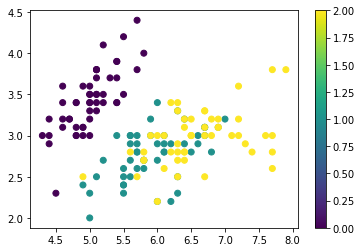

In [4]:
# 속성 중 첫 번째, 두 번째만 사용하여 분류를 그래프로 표현

plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.colorbar()
plt.show()

### 2. Define and Train Model

---

In [5]:
# hidden_size_list 를 변경하여 신경망의 노드 수나 층 수를 지정할 수 있습니다. (Edit 1)

# 입력층 노드 4개, 출력층 노드 3개는 고정이므로 은닉층의 갯수와 노드 수를 지정해주면 됩니다.

# 예시) 2층 신경망 (은닉층1 노드 2개)
# hidden_size_list=[2] 

# 예시) 3층 신경망 (은닉층1 노드 3개, 은닉층2 노드 3개)
# hidden_size_list=[3, 3] 

# 예시) 4층 신경망 (은닉층1 노드 5개, 은닉층2 노드 3개, 은닉층3 노드 2개)
# hidden_size_list=[5, 3, 2] 

hidden_size_list = [5, 3, 2]

net = MultiLayerNet( input_size=x_train.shape[1], hidden_size_list = hidden_size_list, output_size=3, activation='relu', weight_init_std='he' )


# 학습률을 바꿀 수 있습니다. (Edit 2)
# 1, 0.1, 0.01, 0.001 등 여러 값을 시도해보세요.

learning_rate = 0.01

train_loss_list = []
train_acc_list = []
test_acc_list = []


# 반복 횟수를 바꿀 수 있습니다. (Edit 3)
# 정확도가 계속 증가할 여지가 있다면 반복 횟수를 늘릴 필요가 있습니다.

for i in range(10000):
    
    # 기울기 계산
    grad = net.gradient(x_train, y_train)

    # 가중치 갱신    
    for key in net.params:
        net.params[key] -= learning_rate * grad[key]
                
    # 손실 계산
    loss = net.loss(x_train, y_train)
    
    train_loss_list.append(loss)
    
    # 정확도 출력 빈도 변경 가능
    if i % 10 == 0:
        train_acc = net.accuracy(x_train, y_train)
        test_acc = net.accuracy(x_test, y_test)
        train_acc_list.append( train_acc )
        test_acc_list.append( test_acc )
        print('iter: {} loss: {} test accuracy: {:.4f} train accuracy: {:.4f}'.format(i, loss, net.accuracy(x_test, y_test), net.accuracy(x_train, y_train) ))
        
        

iter: 0 loss: 1.0933841975620253 test accuracy: 0.3000 train accuracy: 0.3417
iter: 10 loss: 1.0572303348193448 test accuracy: 0.3000 train accuracy: 0.3417
iter: 20 loss: 1.042161527463247 test accuracy: 0.3000 train accuracy: 0.3417
iter: 30 loss: 1.0271878052164685 test accuracy: 0.3000 train accuracy: 0.3500
iter: 40 loss: 1.0132805066328792 test accuracy: 0.3333 train accuracy: 0.3667
iter: 50 loss: 1.0012102729792909 test accuracy: 0.4000 train accuracy: 0.4250
iter: 60 loss: 0.9899222876241093 test accuracy: 0.4000 train accuracy: 0.5167
iter: 70 loss: 0.9794900396958444 test accuracy: 0.4333 train accuracy: 0.5833
iter: 80 loss: 0.9711624106915804 test accuracy: 0.5333 train accuracy: 0.6083
iter: 90 loss: 0.9621290756644544 test accuracy: 0.5667 train accuracy: 0.6417
iter: 100 loss: 0.953296051755918 test accuracy: 0.5667 train accuracy: 0.6667
iter: 110 loss: 0.9471898843529143 test accuracy: 0.5667 train accuracy: 0.6667
iter: 120 loss: 0.9363184675614552 test accuracy: 0.5

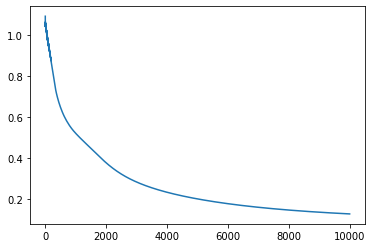

In [6]:
# 손실 함수 값의 변화

plt.plot(train_loss_list)
plt.show()

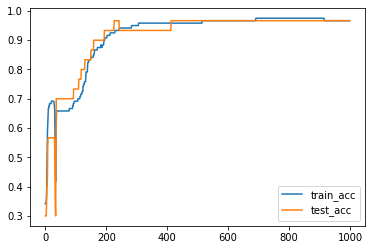

In [7]:
# Train set, test set 정확도 추이

plt.plot(train_acc_list, label='train_acc')
plt.plot(test_acc_list, label='test_acc')
plt.legend()
plt.show()

### 3. Test Model

---

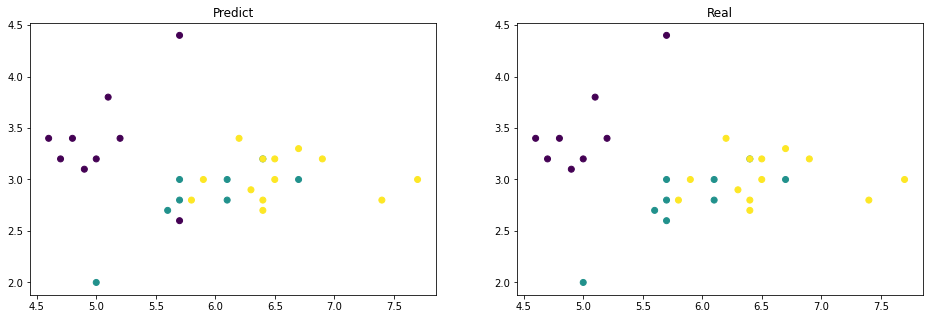

In [8]:
# 속성 중 두 개만 사용하여 예측 값을 실제와 비교하는 그래프

o_test = net.predict(x_test)
o_test = np.argmax(o_test, axis=1)

fig = plt.figure(figsize=(16, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.scatter(x_test[:, 0], x_test[:, 1], c = o_test)
ax2.scatter(x_test[:, 0], x_test[:, 1], c = y_test)

ax1.set_title('Predict')
ax2.set_title('Real')

plt.show()